# Assignment 2
### Learning Outcomes 
By completing this assignment, you will gain and demonstrate skills relating to 
- working within the python environment  
- visualizing of numerical data continued 
- tabulation and plotting of discrete data 
- Calculating joint, marginal, and conditional probabilities  
- Summarizing and plotting numerical data by group 

### Problem Description
We will use the same dataset on incomes from last week (income_dataset.csv). 

The data set has the following data columns:
- age: Age in years
- workclass: Classification of workplace:
    - Private: Employed in private company
    - Local-gov: Local government
    - State-gov: State government
    - Federal-gov: Federal government 
    - Self-emp-inc: Self employed in own company
    - Self-emp-not-inc: Self employed in other legal format
- education: Education level
- educational-num: Numerical level of education 
- marital-status
- occupation 
- race
- gender
- capital-gain: Annual gains from capital investments as reported in tax return 
- capital-loss: Annual loss from capital investments 
- hours-per-week: Self-reported number of hours per week worked 
- native-country: Country of birth 
- income: Annual salary in USD (without capital gains)
- month_of_birth: Birth month (1-12)

You are allowed to use numpy, pandas, matplotlib, and seaborn packages - please do not use other packages that are not supported in the course. 

To solve this homework, you are expected to read portions of the Python for Data Analysis textbook - or use the online documentation on Python. To help you not get lost, we will point you to the relevant book section for the various tasks. However, you may have to go back and read some basics if you realize that you are missing understanding on some foundational concept. 

### Overview of plotting (pg. 219-240)
Read pages 219 to 231 in the Python for Data Analysis book. While we do not assign a specific task, the knowledge gained here will help in completing the tasks in the rest of this homework. In addition, step through this https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb. It is suggested that you download the notebook and run it locally to fully benefit from the tutorial.  

### Submit via OWL
Use the jupyter notebook provided and fill in your answer in the code cells. Before submitting, please make sure you clear the output prior to submission (Cell Menu -> All Outputs -> Clear ). Submit your notebook file under the file name YourUserID_Assign1.ipynb 

Make sure that you develop your code with Python 3.7 as the interpreter. The TA will not endeavor to fix code that uses earlier versions of Python (e.g. 2.7). Make sure that your code includes all statements that it requires to work properly when calling Cell->Run All. 

### General Marking criteria: 
- Does the program behave according to specifications?
- Are you using appropriate data structures?
- Is the output according to specifications?
- Are all questions answered fully? Written responses must be answered in full English sentences.
- Comments for pieces of code that are longer than few line 
- All figures require axis labels 
- All Figures require an informative caption
- Use Python coding conventions and good programming techniques, for example:
    * meaningful variable names
    * conventions for naming variables and constants
    * Use of constants where appropriate
    * Readability: indention, white space, consistency.

## Task 1: Plotting histograms II (Subplots) (? / 15 points)
Preliminaries: Import the packages relevant to this Assigment

In case you notebook environment is not automatically setup to include the figures inline, you may have to run the following code: <br>
import matplotlib <br>
matplotlib.use('TkAgg') <br>
%matplotlib inline <br>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline

### Question1. Load the movieDataset and calculate the new column "total" as the income + capital-gain - capital-loss (? / 2 points)

In [54]:
df = pd.read_csv("income_dataset.csv")
df["total"] = df["income"] + df["capital-gain"] - df["capital-loss"]

### Question2. Generate a new figure with an array of 6 subplots (2 rows and 3 columns recommended, see pages 220-223). In the subplots, provide a histogram for the variables age, educational-num, income, month of birth, hours per week, and total. For each variable, choose an appropriate number of bins (? / 4 points)

Hint: For variables with discrete integer values (age, educational-num,month-of-birth, hours-per-week), it is natural to have a separate bin for each unique value. For this you need to set the number of bins to the range of the data. 
To see what happens when you do not do this, plot a histogram of age with either 50 or 100 bins. 


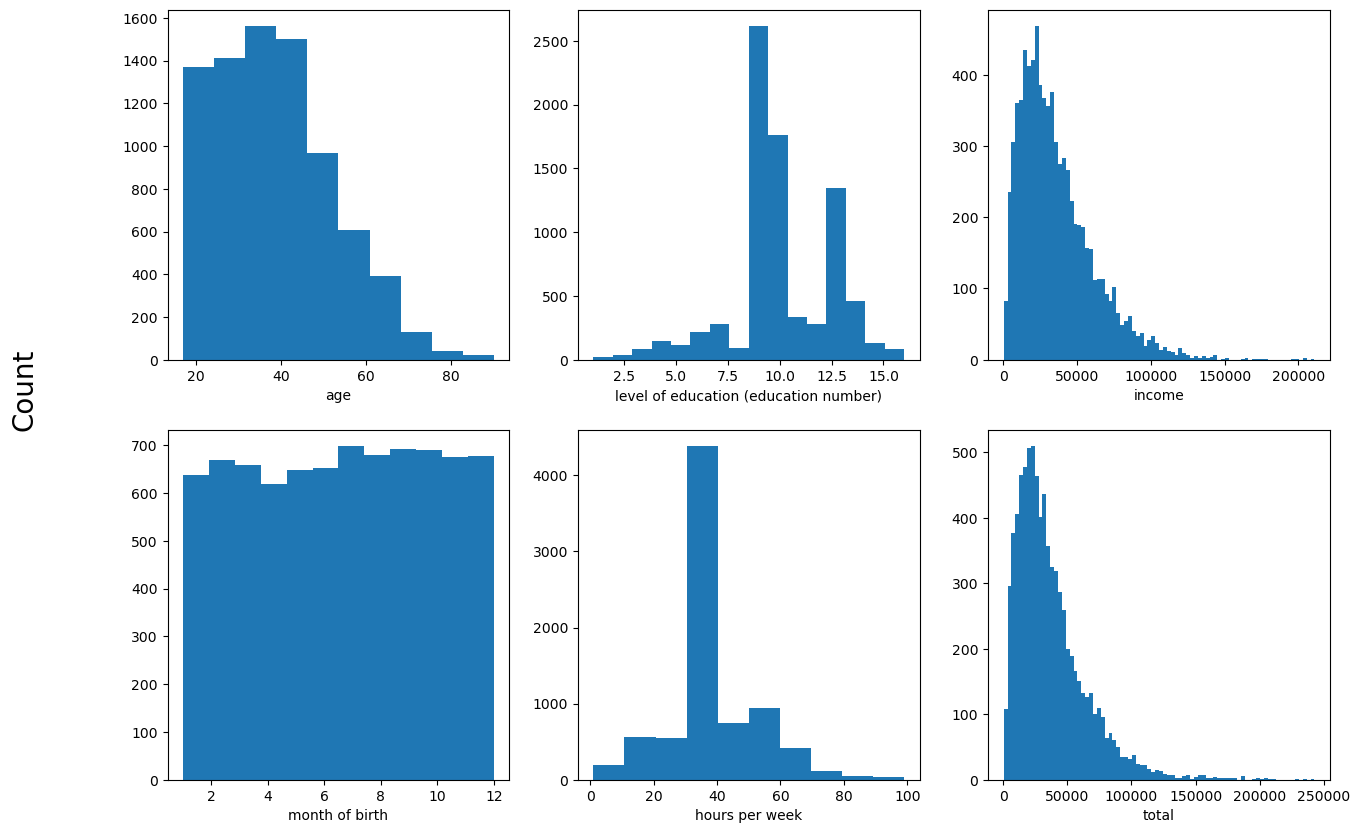

In [117]:
# creating array figure with 6 subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

# figures listed from top left to bottom right position in array
# age histogram
axes[0, 0].hist(df["age"], bins = 10)
axes[0, 0].set_xlabel("age")

# education level histogram
axes[0, 1].hist(df["educational-num"], bins = 16)
axes[0, 1].set_xlabel("level of education (education number)")

# income histogram
axes[0, 2].hist(df["income"], bins = 80)
axes[0, 2].set_xlabel("income")

# month of birth histogram
axes[1, 0].hist(df["month_of_birth"], bins = 12)
axes[1, 0].set_xlabel("month of birth")

# hours per week histogram
axes[1, 1].hist(df["hours-per-week"], bins = 10)
axes[1, 1].set_xlabel("hours per week")

# total histogram
axes[1, 2].hist(df["total"], bins = 80)
axes[1, 2].set_xlabel("total")

# adding common y-axis label
fig.supylabel("Count", fontsize = 20)

# remove extra lines
plt.show()

Figure 1. Frequency distribution of age, education level, income, birth month, hours worked per week, and total income in various histograms.

### Question 3. Written response: Justify the number of bins chosen for each variable. ( ? / 3 points)

age: 10 bins divides 8000 data entries without showing excessive noise.  

educational-num: 16 bins divides 8000 evenly, and 16 is the total number of potential levels that could be reported (np.unique(df["educational-num"])  

income: 80 bins divides 8000 data entries without showing excessive noise.  

month_of_birth: there is only 12 months of a year, and so 12 bins was selected.  

hours-per-week: 10 bins divides 8000 data entries without showing excessive noise.  

total: 80 bins divides 8000 data entries without showing excessive noise.

### Question 4: Describe the shape of the distribution for each variable, including the number of modes and the shape (symmetric, skew, uniform?).  (? / 6 points)

age: 1 peak, unimodal, tail to the right, right skew.  

educational-num: 2 peaks, bimodal, tail to the left, left skew.  

income: 1 peak, unimodal, tail to the right, right skew.  

month_of_birth: no mode, uniform.  

hours-per-week: 1 peak, unimodal, tail to the right, right skew.  

total: 1 peak, unimodal, tail to the right, right skew.

## Task 2: Tabulating and visualizing categorical data (pg. 24-30 and pg 250-256) (? / 20 points)

### Question1. Create a contingency table of gender (rows) by workclass (columns) without the marginal sums. You may normalize the table by rows or columns. Print to the screen. (? / 4 points)

In [118]:
table = pd.crosstab(df["gender"], df["workclass"])
table

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
gender,,,,,,
Female,76,209,1903,33,108,131
Male,145,305,3684,233,508,213


### Question2. Plot the workclass counts by gender as a grouped bar chart (? / 3 points)

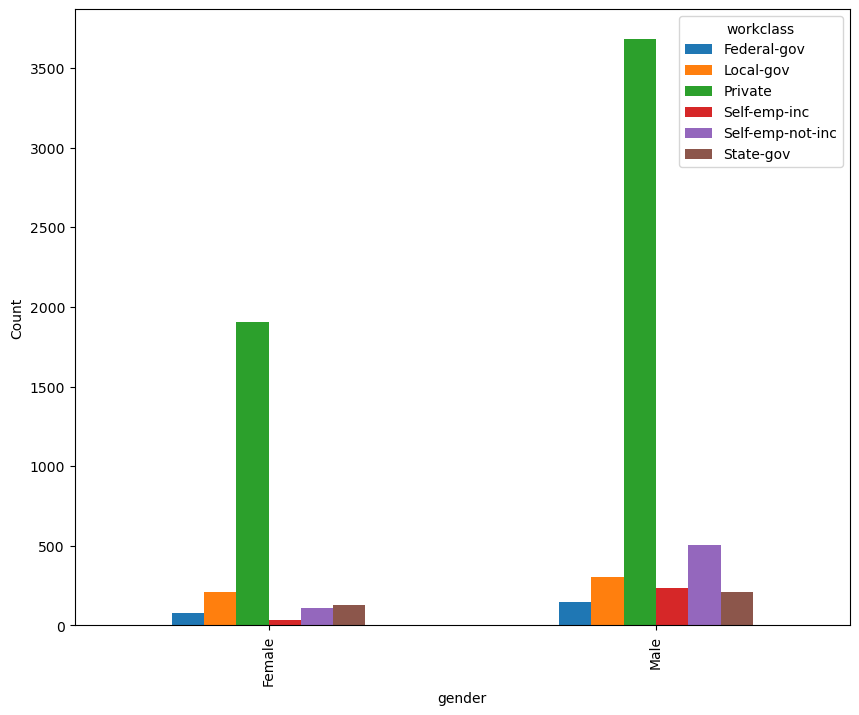

In [85]:
table.plot.bar(figsize = (10, 8), ylabel = "Count")

plt.show()

Figure 2. Frequency of workclass by gender in a bar chart.

### Question3. Make a Figure with 2 subplots. Plot the workclass counts by gender as a grouped bar chart (as in Question 2) in one subplot, and as a stacked barchart the other subplot. (? / 3 points)

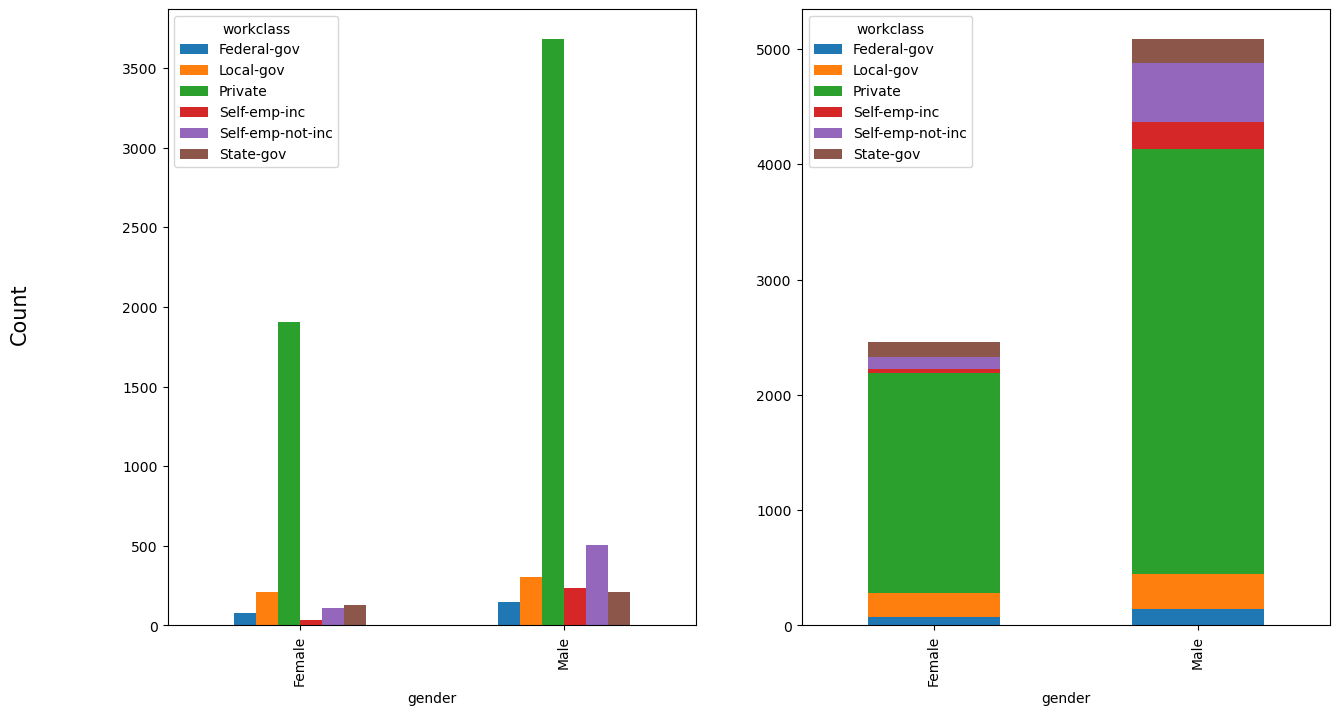

In [138]:
# create array
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))

# grouped bar chart
table.plot(kind = "bar", ax = axes[0])
# stacked bar chart
table.plot(kind = "bar", stacked = True, ax = axes[1])

# adding common y-axis label
fig.supylabel("Count", fontsize = 15)

plt.show()

Figure 3. Frequency of workclass by gender in a grouped and stacked barchart.

### Question4. Generate a table of gender (rows) and workclass (columns), normalized by the row-marginal counts of males and females , such that you have *conditional probabilities of workclass, given the gender* . Print the table and make a stacked barplot of these conditional probabilities. (? / 3 points)

Hint: Please check the lecture carefully for the definition of a *conditional probability* and how to compute it. We are looking here for $p(workclass | gender)$.

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
gender,,,,,,
Female,0.030894,0.084959,0.773577,0.013415,0.043902,0.053252
Male,0.028498,0.059945,0.724057,0.045794,0.099843,0.041863


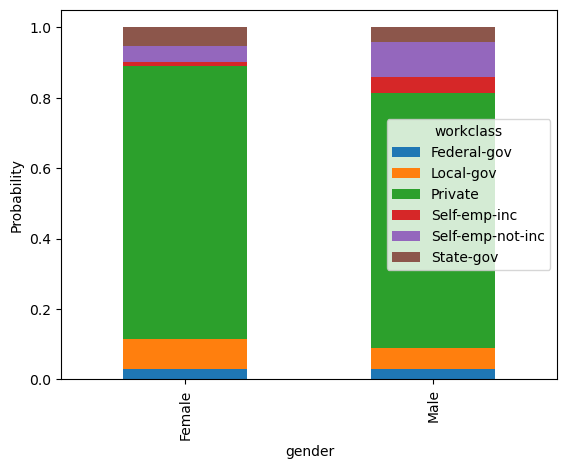

In [213]:
# table of gender (rows) and workclass (columns)
table = pd.crosstab(df["gender"], df["workclass"])

# normalized to sum to 1
# P(workclass|gender) = P(workclass and gender)/P(gender)
normed_table = table.div(table.sum(1), axis = 0)
display(normed_table)

# barplot of conditional probabilities
normed_table.plot(kind = "bar", stacked = True, ylabel = "Probability")

plt.show()

Figure 4. Conditional probabilities of workclass given gender in barplot.

### Question5. Generate a table of workclass (rows) and gender (columns), with the *conditional probabilities of the gender, given the workclass*.  Print the table and show the conditional probabilities as a stacked barplot for each workclass. Written answer: What is the height of the stacked bar (males + females) for each workclass and why? (? / 3 points)
Hint: Again - check the definition of conditional probability to determine whether you need to normalize the counts by the sum of the rows (index) or columns. 

gender,Female,Male
workclass,,
Federal-gov,0.343891,0.656109
Local-gov,0.406615,0.593385
Private,0.340612,0.659388
Self-emp-inc,0.124060,0.875940
Self-emp-not-inc,0.175325,0.824675
State-gov,0.380814,0.619186


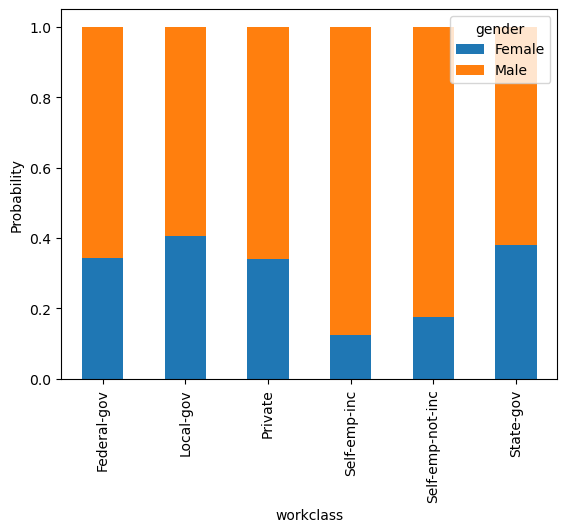

In [220]:
# table of workclass (rows) and gender (columns)
table = pd.crosstab(df["workclass"], df["gender"])

# normalized to sum to 1
# P(gender|workclass) = P(gender and workclass)/P(workclass)
normed_table = table.div(table.sum(1), axis = 0)
display(normed_table)

# barplot of conditional probabilities
normed_table.plot(kind = "bar", stacked = True, ylabel = "Probability")

plt.show()

Figure 5. Conditional probabilities of gender given workclass in barplot.  

Height of each stacked bar is 1.0 because the probability is split between males and females, and together they must add to 1.0. There are only two possibilities, male or female.

### Question6. Written response: Compare the 2 plots from questions 4 and 5. For each plot, describe which aspect of the data can be most readily seen (? / 4 points)

Figure 4 shows the distribution of females in each workclass, while Figure 5 shows the ratio of females to males in each workclass.  

For Figure 4, it is most clear that for either gender, any random individual in the sample is most likely to be employed in a private company, with females appearing to be more likely than males. 

For Figure 5, it shows that in each workclass, it is more likely for any random individual from the sample to be male, implying there are more males than females in each workclass.

## Task 3: Probabilities (? / 20 points)

For each of the questions in this task, you  should show the formula you used to compute the probability. <br>
For each of the tasks in this section, print the answer in a full sentence. For instance, your output should not just be a value but instead: <br>
__Probability of being employed in a private company given that the gender is male, is 0.xxx__ <br>
Using the contingency tables, compute and print.

### Question1. The marginal probability of a person in the sample being employed by the federal government (? / 2 points)

In [252]:
# table of gender (rows) and workclass (columns)
table = pd.crosstab(df["gender"], df["workclass"], margins = True)
# display(table)

# marginal probability calculation
# P(Federal-gov) = All Federal-gov/All
prob = table["Federal-gov"].iloc[2]/table["All"].iloc[2]
prob

# answer in full sentence
print("Probability of a person being employed by the federal government is %0.3f" %prob)

Probability of a person being employed by the federal government is 0.029


### Question2. the marginal probability being employed by a private company (? / 2 points)

In [256]:
# table of gender (rows) and workclass (columns)
table = pd.crosstab(df["gender"], df["workclass"], margins = True)
# display(table)

# marginal probability calculation
# P(Private) = All Private/All
prob = table["Private"].iloc[2]/table["All"].iloc[2]
prob

# answer in full sentence
print("Probability of a person being employed by a private company is %0.3f" %prob)

Probability of a person being employed by a private company is 0.740


### Question3. the marginal probability in the sample of being female (? / 2 points)

In [266]:
# table of gender (rows) and workclass (columns)
table = pd.crosstab(df["gender"], df["workclass"], margins = True)
# display(table)

# marginal probability calculation
# P(female) = All female/All
prob = table["All"].iloc[0]/table["All"].iloc[2]
prob

# answer in full sentence
print("Probability of a person being female is %0.3f" %prob)

Probability of a person being female is 0.326


### Question4. the conditional probability of being employed in Local Government given that the gender is female (? / 2 points)

In [265]:
# table of gender (rows) and workclass (columns)
table = pd.crosstab(df["gender"], df["workclass"])

# normalized to sum to 1
# P(workclass|gender) = P(workclass and gender)/P(gender)
normed_table = table.div(table.sum(1), axis = 0)
# display(normed_table)

prob = normed_table["Local-gov"].iloc[0]

# answer in full sentence
print("Probability of a being employed in Local Government given they are female is %0.3f" %prob)

Probability of a being employed in Local Government given they are female is 0.085


### Question5. the conditional probability of being employed in Local Government given that the gender is male (? / 2 points)

In [269]:
# table of gender (rows) and workclass (columns)
table = pd.crosstab(df["gender"], df["workclass"])

# normalized to sum to 1
# P(workclass|gender) = P(workclass and gender)/P(gender)
normed_table = table.div(table.sum(1), axis = 0)
# display(normed_table)

prob = normed_table["Local-gov"].iloc[1]

# answer in full sentence
print("Probability of a being employed in Local Government given they are male is %0.3f" %prob)

Probability of a being employed in Local Government given they are male is 0.060


### Question6. the conditional probability of the gender being female given that the person is employed in Local government (? / 2 points)

In [276]:
# table of workclass (rows) and gender (columns)
table = pd.crosstab(df["workclass"], df["gender"])

# normalized to sum to 1
# P(gender|workclass) = P(gender and workclass)/P(workclass)
normed_table = table.div(table.sum(1), axis = 0)
# display(normed_table)

prob = normed_table["Female"].iloc[1]

# answer in full sentence
print("Probability of a being female given they are in Local Government is %0.3f" %prob)

Probability of a being female given they are in Local Government is 0.407


### Question7.  the conditional probability of the gender being male given that the person is employed in Local government  (? / 2 points)

In [280]:
# table of workclass (rows) and gender (columns)
table = pd.crosstab(df["workclass"], df["gender"])

# normalized to sum to 1
# P(gender|workclass) = P(gender and workclass)/P(workclass)
normed_table = table.div(table.sum(1), axis = 0)
# display(normed_table)

prob = normed_table["Male"].iloc[1]

# answer in full sentence
print("Probability of a being male given they are in Local Government is %0.3f" %prob)

Probability of a being male given they are in Local Government is 0.593


### Question8. How does the probability of  female change from when you don’t know the workclass to when you know that the person works in local government?  (? / 2 points)

Probability of being female (0.326) increases when you know they work in local government (0.407).

### Question9. What is the joint probability of a person being female AND employed in Local government? (? / 2 points)

In [291]:
# table of gender (rows) and workclass (columns)
table = pd.crosstab(df["gender"], df["workclass"], margins = True)
# display(table)

# joint probability calculation
# P(female and Local-gov) = (female and Local-gov)/All
prob = table["Local-gov"].iloc[0]/table["All"].iloc[2]
prob

# answer in full sentence
print("Probability of being female and in Local government is %0.3f" %prob)

Probability of being female and in Local government is 0.028


### Question10. What is the expected probability of being in local government AND being female IF gender and workclass were independent? (? / 2 points)

In [296]:
# table of gender (rows) and workclass (columns)
table = pd.crosstab(df["gender"], df["workclass"], margins = True)
# display(table)

# joint probability calculation if events are independent
# P(female and Local-gov) = P(female)*P(Local-gov)
prob = table["All"].iloc[0]/table["All"].iloc[2]*table["Local-gov"].iloc[2]/table["All"].iloc[2]

# answer in full sentence
print("Probability of being female and in Local government if gender and workclass are independent is %0.3f" %prob)

Probability of being female and in Local government if gender and workclass are independent is 0.022


## Task 4: Descriptive Statistics by Category (pg 24-30 and pg 250-256) (? / 20 points)

### Question1. Using pandas statistics functions (pg. 137-141) and the groupby method determine the mean income by gender. (? / 5 points)

In [297]:
df["income"].groupby(df["gender"]).mean()

gender
Female    29958.721035
Male      39205.211701
Name: income, dtype: float64

### Question2. Determine and print the mean income by workclass. For this question use a for loop to iterate over the different workclasses that exist. This needs to be done in three steps (? / 15 points)

You need to use a for loop here- do not simply write down individual print statements 

#### a. Use the groupby function to calculate the mean by workclass (? / 3 points)

In [337]:
print(df["income"].groupby(df["workclass"]).mean())
meanIncome = df["income"].groupby(df["workclass"]).mean()

workclass
Federal-gov         45349.361991
Local-gov           38897.745136
Private             34924.670664
Self-emp-inc        49726.165414
Self-emp-not-inc    39795.902597
State-gov           38128.581395
Name: income, dtype: float64

#### b. Create a variable that stores the names of each workclass  (? / 3 points)
Hint:  use .groups.keys() on the  groupby object returned in a. 

In [326]:
# group income by workclass
gp = df.groupby(df['workclass'])
gp

# store names of workclass in names
names = gp.groups.keys()
names

dict_keys(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov'])

#### c. Iterate over this variable using a for loop and print the means for each category using a full sentence of the form "The mean income for an xxxx  is yyyy. (? / 9 points)

In [350]:
# itierating over variable using for loop
for i in names:
    print(f"The mean income for {i} is {round(meanIncome[i],3)}.")

The mean income for Federal-gov is 45349.362.
The mean income for Local-gov is 38897.745.
The mean income for Private is 34924.671.
The mean income for Self-emp-inc is 49726.165.
The mean income for Self-emp-not-inc is 39795.903.
The mean income for State-gov is 38128.581.


## Task 5: Histogram visualization by group (? / 25 points)
In this task you will learn how to use __seaborn__. Seaborn is a library built on top of matplotlib and it's closely integrated with pandas data structures.  

### Question1.Using _groupby_ create two series, one that has the income for males, and one for females.  Use _groupby_ to first group the income values by gender and then use _get_group(genderValue)_ to create a new series for the specified gender (? / 4 points)

In [371]:
# group income by gender
gp = df["income"].groupby(df["gender"])

# store names of gender in keys
keys = gp.groups.keys()
keys

# create new series for female
female = gp.get_group("Female")
display(female)

# create new series for male
male = gp.get_group("Male")
display(male)

0       84794
6       27072
7        9926
8        5857
13      30196
        ...  
7988    23381
7989     3320
7992    17368
7995    18036
7999    24985
Name: income, Length: 2667, dtype: int64

1         5598
2        30649
3        69119
4        16080
5        14202
         ...  
7993     28209
7994    107156
7996    131300
7997      3303
7998     37964
Name: income, Length: 5333, dtype: int64

### Question2. Visualize on the same plot the distribution of incomes using the histogram – plot the two histograms on top of each other for direct comparison. (? /5 points)

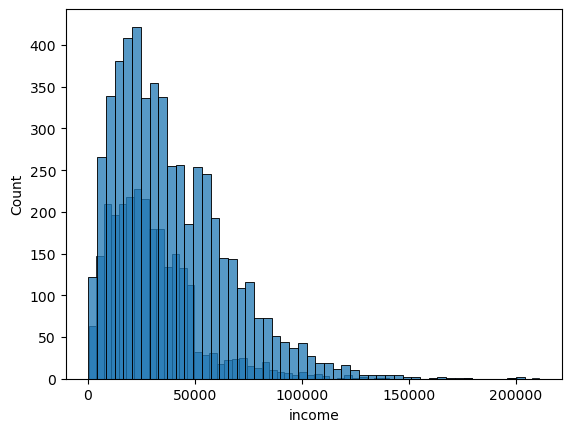

In [390]:
sns.histplot(female)
sns.histplot(male)

plt.show()

Figure 6. Frequency distribution of income by gender in a histogram.

### Question3. Plot the same data, using a boxplot, splitting by gender (? / 4 points)

C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


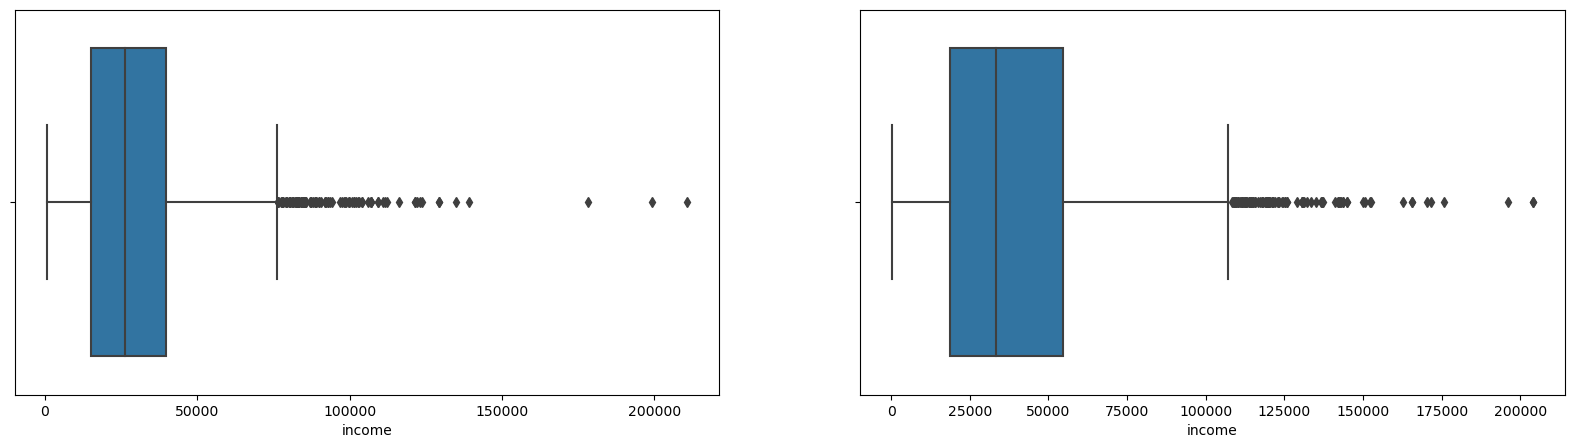

In [394]:
# create array of figures
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# create a boxplot for each series
sns.boxplot(female, ax = axes[0])
sns.boxplot(male, ax = axes[1])

plt.show()

Figure 7. Boxplot showing summary statistics of income by gender.

### Question4. Plot the same data using a violin plot, splitting by gender. (? / 4 points)

C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


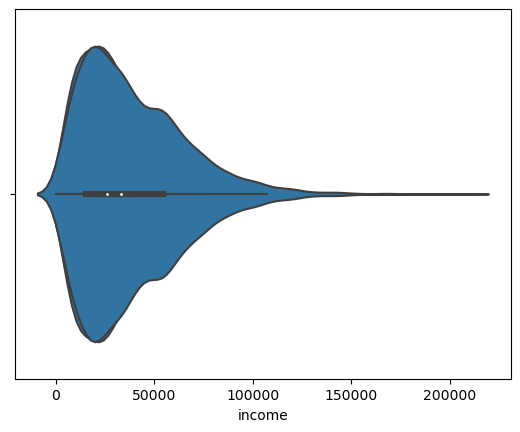

In [402]:
# create a boxplot for each series
sns.violinplot(female)
sns.violinplot(male)

plt.show()

Figure 8. Summary statistics and density of income data split by gender in violinplot.|

### Question5. Make a boxplot of income split by workclass. (? /4 points)

C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\1-School\Year

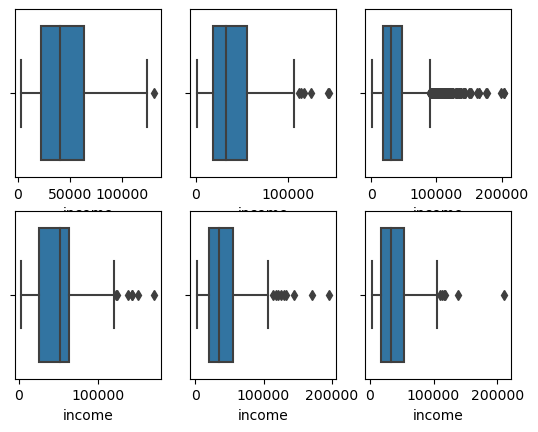

In [417]:
# group income by gender
gp = df["income"].groupby(df["workclass"])

# store names of gender in keys
keys = gp.groups.keys()

federal = gp.get_group("Federal-gov")
local = gp.get_group("Local-gov")
private = gp.get_group("Private")
selfEmpInc = gp.get_group("Self-emp-inc")
selfEmpNotInc = gp.get_group("Self-emp-not-inc")
state = gp.get_group("State-gov")

# create array of figures
fig, axes = plt.subplots(nrows = 2, ncols = 3)

sns.boxplot(federal, ax = axes[0][0])
sns.boxplot(local, ax = axes[0][1])
sns.boxplot(private, ax = axes[0][2])
sns.boxplot(selfEmpInc, ax = axes[1][0])
sns.boxplot(selfEmpNotInc, ax = axes[1][1])
sns.boxplot(state, ax = axes[1][2])

plt.show()

Figure 9. Boxplot showing summary statistics of income split by workclass.

### Question6. Make a violin plot of income - with workclass on the x-axis, and then split by gender. In which workclass does the gender pay gap look smallest? (? / 4 points).
Hint: doing plots where the data is split by multiple categories is easy in seaborn - using hue as additional input argument. 


C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\1-School\Year

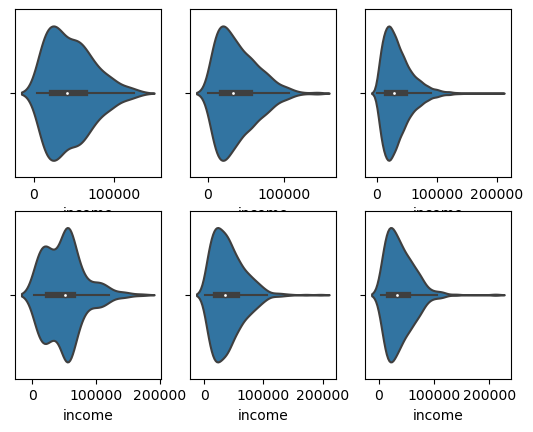

In [421]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)

sns.violinplot(federal, ax = axes[0][0])
sns.violinplot(local, ax = axes[0][1])
sns.violinplot(private, ax = axes[0][2])
sns.violinplot(selfEmpInc, ax = axes[1][0])
sns.violinplot(selfEmpNotInc, ax = axes[1][1])
sns.violinplot(state, ax = axes[1][2])

plt.show()

Figure 10. Summary statistics and density of income data in relation to workclass, split by gender, shown in violinplot.  

Gender pay gap in private looks the smallest.